<a href="https://colab.research.google.com/github/tinemyumi/saude-mental-datasus/blob/main/notebooks/6_eda_pos_pandemia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Relatório**

### **Conteúdo**
- **1.1.** Visão Geral
- **1.2.** Panorama Geral
- **1.3.** Análise Temporal
- **1.4.** Perfil Sociodemográfico
- **1.5.** Diagnóstico
- **1.6.** Análise Geográfica
- **1.7.** Óbito

### **Histórico de Alterações**

**Data:** 05/02/2026 | **Autor:** Larissa Tinem | Visão geral, panorama geral, análise temporal, perfil sociodemográfico, diagnóstico, análise geográfica, óbito

# **1. Análise Exploratória — Pós Pandemia**

## **Objetivo**

Analisar o comportamento das internações por transtornos mentais após a pandemia, identificando padrões temporais, demográficos e regionais.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importando as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

## **1.1. Visão Geral**

In [ ]:
# Criando o dataframe
df = pd.read_parquet('/content/drive/MyDrive/Dataframes/df_sih_sus_sem_tratamento/saude_mental_pos_pandemia.parquet')

# Visualizando as 5 primeiras linhas
df.head()

,UF_ZI,ANO_CMPT,MES_CMPT,NASC,IDADE,SEXO,RACA_COR,ESPEC,IDENT,MUNIC_RES,...,COBRANCA,MUNIC_MOV,CID_ASSO,CID_MORTE,COMPLEX,DT_INTER,DT_SAIDA,QT_DIARIAS,DIAS_PERM,MORTE
130,350000,2023,1,1995-05-30,27,1,03,05,1,355030,...,12,355030,0000,0000,02,2022-12-28,2023-01-02,5,5,0
131,350000,2023,1,1987-04-30,35,3,01,05,1,355030,...,12,355030,0000,0000,02,2022-12-12,2023-01-03,22,22,0
132,350000,2023,1,1976-09-12,46,1,02,05,1,355030,...,12,355030,0000,0000,02,2022-12-25,2023-01-03,9,9,0
133,350000,2023,1,1991-02-05,31,1,02,05,1,355030,...,12,355030,0000,0000,02,2022-12-28,2023-01-03,6,6,0
248,350000,2023,1,1991-11-24,31,1,02,05,1,355030,...,12,355030,0000,0000,02,2022-12-24,2023-01-02,9,9,0


In [ ]:
# Quantidade de linhas e colunas
print(df.shape)

(183462, 23)


In [ ]:
# Colunas
print('COLUNAS: ', df.columns)
print('-'*80)

# Informações sobre o dataset
print('INFORMAÇÕES: ')
print(df.dtypes)

COLUNAS:  Index(['UF_ZI', 'ANO_CMPT', 'MES_CMPT', 'NASC', 'IDADE', 'SEXO', 'RACA_COR',
       'ESPEC', 'IDENT', 'MUNIC_RES', 'DIAG_PRINC', 'DIAG_SECUN', 'CAR_INT',
       'COBRANCA', 'MUNIC_MOV', 'CID_ASSO', 'CID_MORTE', 'COMPLEX', 'DT_INTER',
       'DT_SAIDA', 'QT_DIARIAS', 'DIAS_PERM', 'MORTE'],
      dtype='object')
--------------------------------------------------------------------------------
INFORMAÇÕES: 
UF_ZI                 object
ANO_CMPT               int64
MES_CMPT               int64
NASC          datetime64[ns]
IDADE                  int64
SEXO                  object
RACA_COR              object
ESPEC                 object
IDENT                 object
MUNIC_RES             object
DIAG_PRINC            object
DIAG_SECUN            object
CAR_INT               object
COBRANCA              object
MUNIC_MOV             object
CID_ASSO              object
CID_MORTE             object
COMPLEX               object
DT_INTER      datetime64[ns]
DT_SAIDA      datetime64[ns]
QT_

In [ ]:
df.describe()

,ANO_CMPT,MES_CMPT,NASC,IDADE,DT_INTER,DT_SAIDA,QT_DIARIAS,DIAS_PERM
count,183462.000000,183462.000000,183462,183462.000000,183462,183462,183462.000000,183462.000000
mean,2023.507500,6.546609,1982-10-20 02:24:26.749517568,40.652549,2023-06-01 02:32:12.511364352,2024-01-04 19:44:28.476305920,14.801245,15.348094
min,2023.000000,1.000000,1899-12-30 00:00:00,0.000000,2008-01-01 00:00:00,2022-08-05 00:00:00,0.000000,0.000000
25%,2023.000000,4.000000,1972-11-26 06:00:00,29.000000,2023-05-01 00:00:00,2023-07-03 00:00:00,4.000000,4.000000
50%,2024.000000,7.000000,1983-10-04 00:00:00,40.000000,2023-11-21 00:00:00,2024-01-03 00:00:00,12.000000,13.000000
75%,2024.000000,10.000000,1994-06-17 00:00:00,51.000000,2024-05-31 00:00:00,2024-07-02 00:00:00,28.000000,29.000000
max,2024.000000,12.000000,2024-12-17 00:00:00,99.000000,2024-12-31 00:00:00,2024-12-31 00:00:00,129.000000,129.000000
std,0.499945,3.454533,NaN,15.026097,NaN,NaN,11.462641,11.673692


In [ ]:
# Verificando valores nulos
df.isnull().sum()

,0
UF_ZI,0
ANO_CMPT,0
MES_CMPT,0
NASC,0
IDADE,0
SEXO,0
RACA_COR,0
ESPEC,0
IDENT,0
MUNIC_RES,0


In [ ]:
print('Ano mínimo: ', df['ANO_CMPT'].min())
print('Ano máximo: ', df['ANO_CMPT'].max())

Ano mínimo:  2023
Ano máximo:  2024


## **1.2. Panorama Geral**

### **1.2.1. Número total de internações**

**Análise Inicial**

- **Quantidade de linhas:** 183.462
- **Quantidade de internações:** 182.192
- **Diferença:** 1270

A base apresentou aproximadamente 0,7% de registros duplicados, associados a reprocessamentos administrativos, os quais foram removidos para evitar superestimação do número de internações.

In [ ]:
# Identificando ~evento~ de uma internação
chave_internacao = [
    'UF_ZI',
    'ANO_CMPT',
    'MUNIC_RES',
    'DT_INTER',
    'DT_SAIDA',
    'DIAG_PRINC',
    'SEXO',
    'IDADE',
    'MORTE'
]

# Quantidade total de linhas (internações) do dataset
print('Total de linhas: ', df.shape[0])

# Elimina duplicatas de acordo com o evento de internação
df_tratado = df.drop_duplicates(subset=chave_internacao)

# Conta o total de internações
total_internacoes = df_tratado.shape[0]
print(f'Total de Internações: {total_internacoes}')

# Diferença entre valor do dataset inicial com o valor restante de internações
diferenca = df.shape[0] - total_internacoes
print(f'Diferença: {diferenca}')


Total de linhas:  183462
Total de Internações: 182192
Diferença: 1270


### **1.2.2. Média Mensal de Internações**

**Análise Inicial**

O número médio de internações por mês no período analisado foi de aproximadamente 7.591 internações, calculado a partir da contagem mensal de internações únicas.

In [ ]:
df_tratado = df_tratado.copy()

df_tratado['ano_mes'] = (
    df_tratado['ANO_CMPT'].astype(str) + '-' +
    df_tratado['MES_CMPT'].astype(str).str.zfill(2)
)

internacoes_mensal = df_tratado.groupby('ano_mes').size()
n_medio_mensal = internacoes_mensal.mean()
print(f'Média mensal de internações: {n_medio_mensal:.2f}')

Média mensal de internações: 7591.33


### **1.2.3. Quantidade de municípios residente e de internação**

Análise Inicial

As internações ocorrem em  290 municípios, enquanto os pacientes vem de mais de 850 municípios. Isso mostra que os hospitais estão concentrados em poucas cidades, obrigando muitos pacientes a se deslocarem para receber atendimento, evidenciando uma possível desigualdade no acesso à saúde.

In [ ]:
qtde_munic_res = df['MUNIC_RES'].nunique()
print('Quantidade de municípios residente: ', qtde_munic_res)

qtde_munic_int = df['MUNIC_MOV'].nunique()
print('Quantidade de municípios de internação: ', qtde_munic_int)

Quantidade de municípios residente:  859
Quantidade de municípios de internação:  290


## **1.3. Análise Temporal**

### **1.3.1. Evolução Anual das Internações**

**Análise Inicial**

O gráfico mostra um aumento nas internações entre 2023 e 2024, evidenciando o reflexo da pandemia no sistema de saúde.

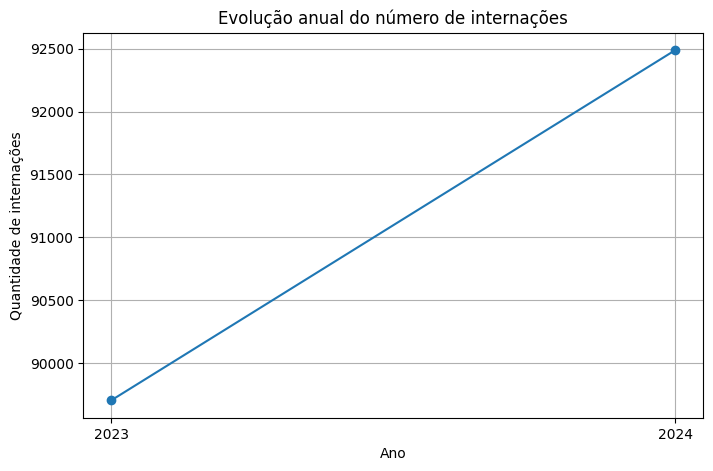

In [ ]:
internacoes_anuais = (
    df_tratado
    .groupby('ANO_CMPT')
    .size()
    .reset_index(name='qtde_internacoes')
)

plt.figure(figsize=(8,5))
plt.plot(
    internacoes_anuais['ANO_CMPT'],
    internacoes_anuais['qtde_internacoes'],
    marker='o',
)
plt.title('Evolução anual do número de internações')
plt.xlabel('Ano')
plt.ylabel('Quantidade de internações')
plt.xticks(internacoes_anuais['ANO_CMPT'])
plt.grid(True)
plt.show()

## **1.4. Perfil Sociodemográfico**

### **1.4.1. Distribuição de Idade**

**Faixas Etárias**

- Jovens: 0 a 19
- Adultos: 20 a 59
- Idosos: 60 ou mais

**Análise Inicial**

 O gráfico revela uma concentração massiva de internações na faixa etária de 20 a 59 anos, superando significativamente os demais grupos. No contexto de desigualdade e pandemia, esse dado é alarmante, pois foca na população economicamente ativa que, muitas vezes por falta de condições de isolamento ou acesso a tratamentos preventivos, acaba sendo a mais exposta e atingida. A disparidade em relação aos idosos (60+) e jovens (0-19) sugere que o impacto hospitalar recai sobre aqueles que sustentam a economia e as famílias, agravando o ciclo de vulnerabilidade social.

In [ ]:
df_tratado = df_tratado.copy()

# Criando faixa etária
bins = [0, 19, 59, 120]
labels = ['0-19', '20-59', '60+']

df_tratado['faixa_etaria'] = pd.cut(
    df_tratado['IDADE'],
    bins=bins,
    labels=labels,
    right=True
)

# Quantidade por faixa etária
qtde_faixa_etaria = (
    df_tratado['faixa_etaria']
    .value_counts()
    .sort_index()
    .reset_index()
)

qtde_faixa_etaria.columns = ['faixa_etaria', 'quantidade']
qtde_faixa_etaria

,faixa_etaria,quantidade
0,0-19,11070
1,20-59,149813
2,60+,21290


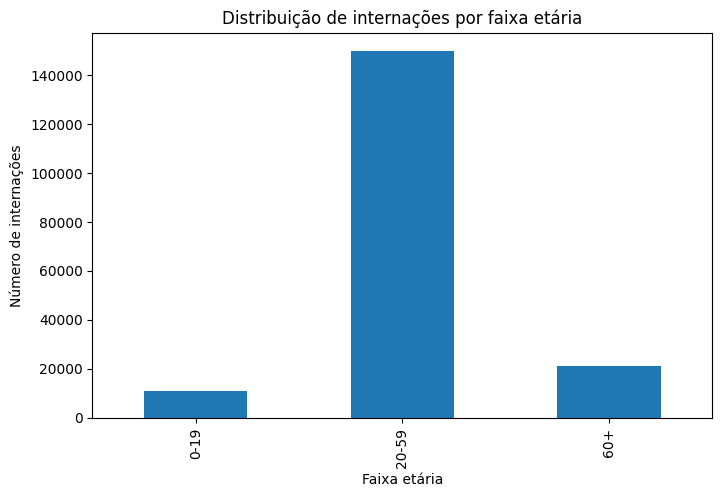

In [ ]:
plt.figure(figsize=(8,5))
qtde_faixa_etaria.set_index('faixa_etaria')['quantidade'].plot(kind='bar')
plt.title('Distribuição de internações por faixa etária')
plt.xlabel('Faixa etária')
plt.ylabel('Número de internações')
plt.show()

### **1.4.2. Distribuição Por Sexo**

**Dicionário dos dados**
- 1: Masculino
- 3: Feminino

**Análise Inicial**

O aumento das internações em 2024 revela o agravamento das crises de saúde mental no pós-pandemia, com um impacto muito superior entre os homens. Esse cenário evidencia uma desigualdade profunda: devido a barreiras culturais e à falta de políticas de prevenção voltadas ao público masculino, muitos homens só chegam ao sistema de saúde em situações de extrema gravidade. O gráfico reforça que, sem suporte psicológico acessível, a população acaba recorrendo à hospitalização como única saída para o sofrimento mental.

In [ ]:
df_tratado['SEXO'] = df_tratado['SEXO'].replace({
    '1': 'Masculino',
    '3': 'Feminino'
})

In [ ]:
distrib_sexo = (
    df_tratado['SEXO']
    .value_counts()
    .reset_index()
)

distrib_sexo.columns = ['sexo', 'quantidade']
print('Distribuição por Sexo')
print('-'*50)
print(distrib_sexo)
print('-'*50)

# Percentual de cada sexo
distrib_sexo['percentual'] = (
    distrib_sexo['quantidade']
    / distrib_sexo['quantidade'].sum()*100
)
print('Percentual de Distribuição de Sexo')
print('-'*50)
distrib_sexo

Distribuição por Sexo
--------------------------------------------------
        sexo  quantidade
0  Masculino      110590
1   Feminino       71602
--------------------------------------------------
Percentual de Distribuição de Sexo
--------------------------------------------------


,sexo,quantidade,percentual
0,Masculino,110590,60.699701
1,Feminino,71602,39.300299


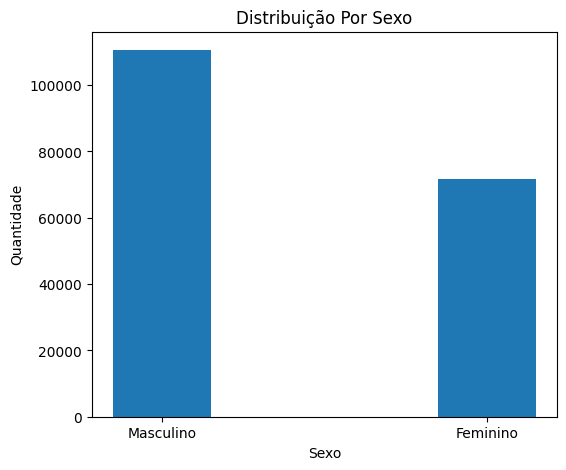

In [ ]:
# Plotar o gráfico
plt.figure(figsize=(6,5))
plt.bar(distrib_sexo['sexo'], distrib_sexo['quantidade'], width = 0.3)
plt.title('Distribuição Por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Quantidade')
plt.show()

### **1.4.3. Distribuição de Raça/Cor**

**Dicionário dos dados**
- 01: Branca
- 02: Parda
- 03: Preta
- 04: Amarela
- 05: Indigena
- 99: Ignorado

**Análise Inicial**

A predominância de internações entre pessoas de raça branca e preta revela as disparidades no acesso à saúde mental. O alto volume nesses grupos, comparado à baixa presença de indígenas e amarelos, sugere uma subnotificação severa ou exclusão desses grupos vulneráveis do sistema hospitalar. Essa concentração evidencia que o impacto das crises pós-pandemia não é registrado de forma igualitária, dificultando políticas de equidade para quem mais precisa.

In [ ]:
df_tratado['RACA_COR'] = df_tratado['RACA_COR'].replace({
    '01': 'Branca',
    '02': 'Parda',
    '03': 'Preta',
    '04': 'Amarela',
    '05': 'Indigena',
    '99': 'Ignorado'
})

In [ ]:
distrib_raca = (
    df_tratado['RACA_COR']
    .value_counts()
    .reset_index()
)

distrib_raca.columns = ['raca', 'quantidade']
print('Distribuição Por Rça/Cor')
print('-'*50)
print(distrib_raca)
print('-'*50)

distrib_raca['percentual'] = (
    distrib_raca['quantidade']
    / distrib_raca['quantidade'].sum()*100
)

print('Percentual de Distribuição de Raça/Cor')
print('-'*50)
distrib_raca

Distribuição Por Rça/Cor
--------------------------------------------------
       raca  quantidade
0    Branca      100951
1     Preta       62306
2     Parda       16966
3   Amarela        1094
4  Ignorado         845
5  Indigena          30
--------------------------------------------------
Percentual de Distribuição de Raça/Cor
--------------------------------------------------


,raca,quantidade,percentual
0,Branca,100951,55.409129
1,Preta,62306,34.197989
2,Parda,16966,9.312154
3,Amarela,1094,0.600465
4,Ignorado,845,0.463796
5,Indigena,30,0.016466


Text(0, 0.5, 'Quantidade')

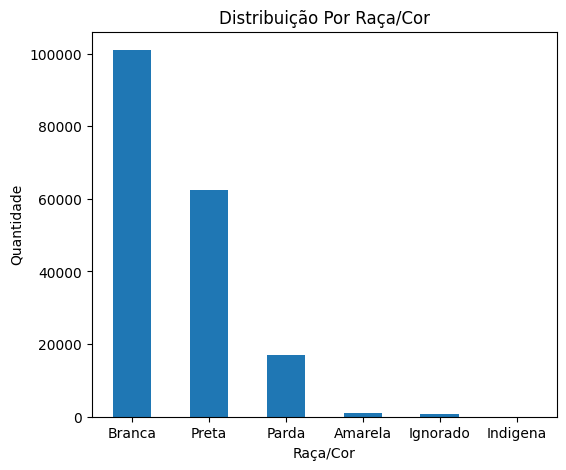

In [ ]:
plt.figure(figsize=(6,5))
plt.bar(distrib_raca['raca'], distrib_raca['quantidade'], width = 0.5
        )
plt.title('Distribuição Por Raça/Cor')
plt.xlabel('Raça/Cor')
plt.ylabel('Quantidade')

## **1.5. Diagnóstico**

### **1.5.1. Top 10 Diagnóstico**

- **1º F192:** Transtornos mentais e comportamentais devidos ao uso de múltiplas drogas e ao uso de outras substâncias psicoativas - síndrome de dependência
- **2º F200:** Esquizofrenia paranóide
- **3º F29:** Psicose não-orgânica não especificada
- **4º F102:** Transtornos mentais e comportamentais devidos ao uso de álcool - síndrome de dependência
- **5º F312:** Transtorno afetivo bipolar, episódio atual maníaco com sintomas psicóticos
- **6º F142:** Transtornos mentais e comportamentais devidos ao uso da cocaína - síndrome de dependência
- **7º F322:** Episódio depressivo grave sem sintomas psicóticos
- **8º F603:** Transtorno de personalidade com instabilidade emocional
- **9º F208:** Outras esquizofrenias
- **10º F028:** Demência em outras doenças especificadas classificadas em outra parte

**Análise Inicial**

No contexto da desigualdade, essa concentração em transtornos severos e no uso de substâncias indica que o sistema hospitalar acaba sendo o único recurso disponível quando o quadro já está agravado. Isso sugere uma falta de suporte preventivo e de cuidados básicos na rede de saúde, fazendo com que as internações ocorram apenas em situações de crise extrema.

In [ ]:
top_10_diag_periodo = (
  df_tratado['DIAG_PRINC']
  .value_counts()
  .head(10)
)

print(top_10_diag_periodo)

DIAG_PRINC
F192    31701
F200    18986
F29     11398
F102    10933
F312    10085
F142     5973
F322     4611
F603     3857
F208     3240
F028     2742
Name: count, dtype: int64


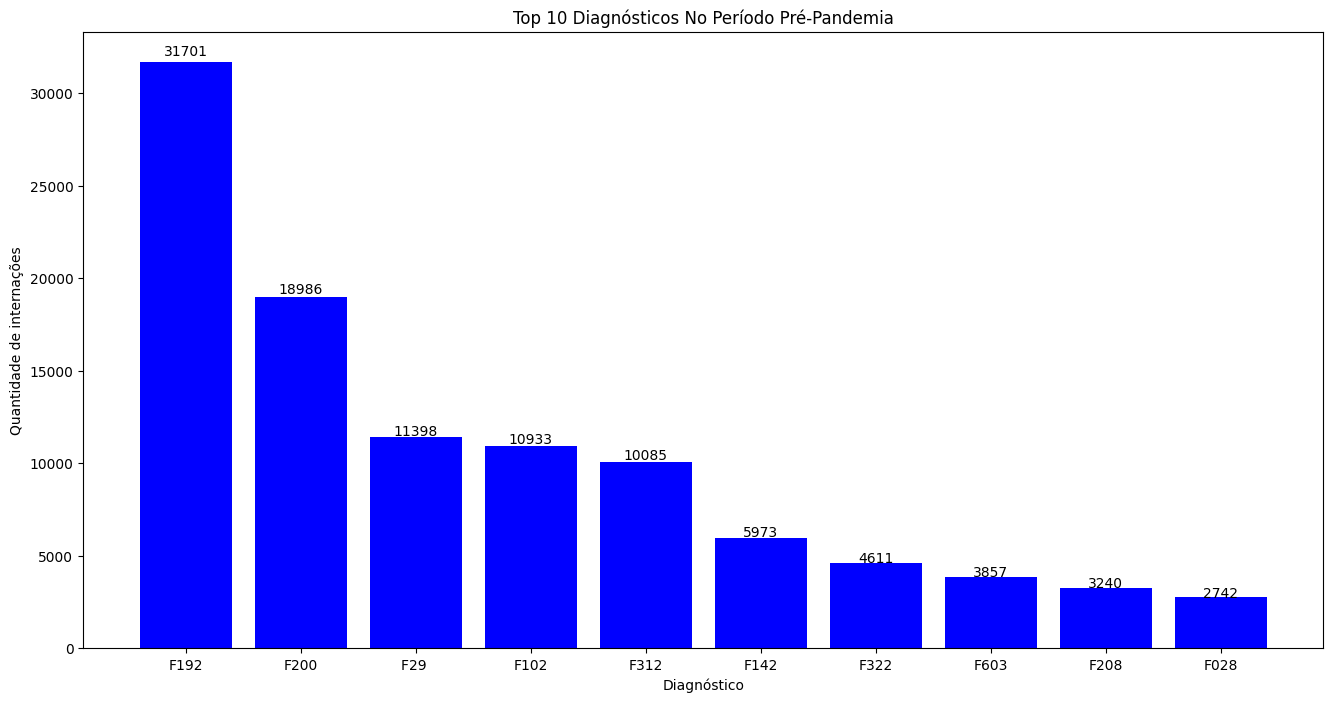

In [ ]:
plt.figure(figsize=(16, 8))
plt.bar(top_10_diag_periodo.index, top_10_diag_periodo.values, color='blue')
plt.title('Top 10 Diagnósticos No Período Pré-Pandemia')
plt.xlabel('Diagnóstico')
plt.ylabel('Quantidade de internações')
for i, v in enumerate(top_10_diag_periodo.values):
    plt.text(i, v + (v * 0.01), str(v), ha='center', fontsize=10)
plt.show()

## **1.6. Análise Geográfica**

### **1.6.1. Fluxo de Origem-Destino**
**Análise Inicial**

A taxa de evasão de 40,78% revela que quase metade dos pacientes precisa sair de sua cidade para tratar a saúde mental, evidenciando um grave vazio assistencial nos municípios de residência. No contexto da desigualdade, esse deslocamento forçado sobrecarrega as famílias mais pobres com custos extras e as afasta de sua rede de apoio, dificultando a recuperação. Esse dado indica que o sistema hospitalar está centralizado em poucas regiões, deixando as cidades menores dependentes e os pacientes mais vulneráveis desassistidos localmente.

In [ ]:
df_tratado['evasao'] = df_tratado['MUNIC_RES'] != df_tratado['MUNIC_MOV']
taxa_evasao = df_tratado['evasao'].mean()*100
print(f'Taxa de evasão fora do município de residência: {taxa_evasao:.2f}')

Taxa de evasão fora do município de residência: 40.78


### **1.6.2 Município de Residência vs de Internação**

**Análise Inicial**

Os dados de evasão mostram que a saúde mental em SP depende de cidades polo: pacientes de mais de mil municípios precisam viajar para se internar em apenas 315 centros médicos. O fluxo mais forte ocorre de São Paulo para Itu, confirmando que a falta de leitos locais obriga milhares de pessoas a buscarem atendimento longe de casa.

In [ ]:
# Criando a tabela de frequência de Origem -> Destino
fluxo_municipios = (
    df_tratado.groupby(['MUNIC_RES', 'MUNIC_MOV'])
    .size()
    .reset_index(name='quantidade')
    .sort_values('quantidade', ascending=False)
)

# Filtrando apenas internações que ocorreram FORA do município de residência
evasao_municipios = fluxo_municipios[fluxo_municipios['MUNIC_RES'] != fluxo_municipios['MUNIC_MOV']]

print("Top 10 Maiores Fluxos de Evasão (Cidade Origem -> Cidade Destino)")
print(evasao_municipios.head(10))

Top 10 Maiores Fluxos de Evasão (Cidade Origem -> Cidade Destino)
     MUNIC_RES MUNIC_MOV  quantidade
2820    355030    352260        3329
2738    354910    351518        1218
2211    353870    354390        1076
1858    353070    351518        1054
1859    353070    352260         917
1772    352900    351670         913
494     350600    352530         837
578     350760    350190         631
849     351280    350190         564
2739    354910    352260         515


**Análise Inicial - Cidades fora de SP que mais dependem de outros municípios**

O gráfico revela o cenário mais extremo da desigualdade regional: diversos municípios apresentam uma taxa de evasão de 100%, o que significa que não possuem nenhuma estrutura de internação própria para saúde mental.

In [ ]:
# Total de internações por cidade de residência
total_residente = df_tratado.groupby('MUNIC_RES').size()

# Total de internações feitas FORA da cidade de residência
total_fora = evasao_municipios.groupby('MUNIC_RES')['quantidade'].sum()

# Taxa de Dependência Externa (%)
taxa_dependencia = (total_fora / total_residente * 100).fillna(0).sort_values(ascending=False)

print("Cidades fora do SP que mais dependem de outros municípios (Taxa de Evasão %):")
print(taxa_dependencia.head(10))

Cidades fora do SP que mais dependem de outros municípios (Taxa de Evasão %):
MUNIC_RES
530010    100.0
110004    100.0
110020    100.0
110080    100.0
120040    100.0
130260    100.0
140010    100.0
150360    100.0
150616    100.0
150775    100.0
dtype: float64


/tmp/ipython-input-1596510551.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


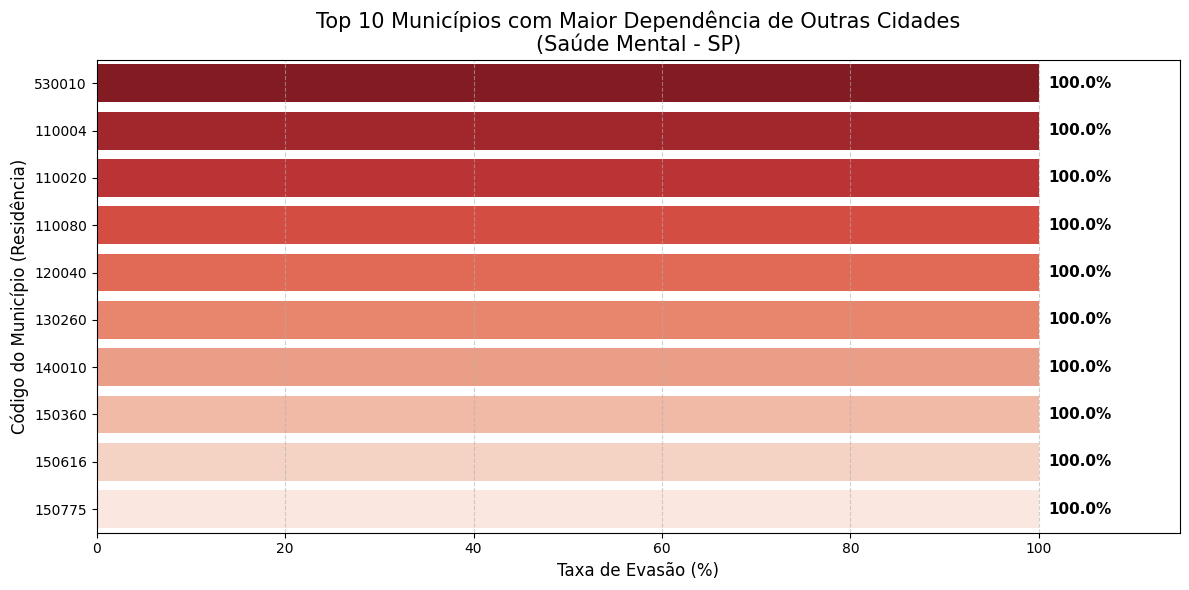

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Preparando os dados (pegando o top 10 e transformando em DataFrame)
top_10_dep = taxa_dependencia.head(10).reset_index()
top_10_dep.columns = ['municipio', 'taxa']

# 2. Configurando o visual
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_10_dep,
    x='taxa',
    y='municipio',
    palette='Reds_r' # Cores quentes para indicar alerta/dependência
)

# 3. Ajustes de títulos e eixos
plt.title('Top 10 Municípios com Maior Dependência de Outras Cidades\n(Saúde Mental - SP)', fontsize=15)
plt.xlabel('Taxa de Evasão (%)', fontsize=12)
plt.ylabel('Código do Município (Residência)', fontsize=12)

# Adicionando os valores das porcentagens ao lado das barras
for i, v in enumerate(top_10_dep['taxa']):
    plt.text(v + 1, i, f'{v:.1f}%', va='center', fontsize=11, fontweight='bold')

plt.xlim(0, 115) # Espaço extra para o texto não cortar
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()

**Análise Inicial - Cidades de SP que mais dependem de outros municípios:**

Diversos municípios paulistas apresentam 100% de taxa de evasão, o que caracteriza um vazio assistencial absoluto na rede de saúde mental. Nessas localidades, não existe nenhuma estrutura própria para internação, o que torna a dependência de cidades vizinhas total e obriga 100% dos pacientes a buscarem socorro hospitalar fora de seu local de residência.

In [ ]:
# Filtra apenas pacientes que MORAM em São Paulo (códigos começando com 35)
df_sp = df_tratado[df_tratado['MUNIC_RES'].astype(str).str.startswith('35')]

# Agora refaça o cálculo com df_sp
total_residente_sp = df_sp.groupby('MUNIC_RES').size()
total_fora_sp = evasao_municipios[evasao_municipios['MUNIC_RES'].astype(str).str.startswith('35')].groupby('MUNIC_RES')['quantidade'].sum()

taxa_dependencia_sp = (total_fora_sp / total_residente_sp * 100).fillna(0).sort_values(ascending=False)

print("Cidades de SP que mais dependem de outros municípios:")
print(taxa_dependencia_sp.head(10))

Cidades de SP que mais dependem de outros municípios:
MUNIC_RES
355730    100.0
355715    100.0
350020    100.0
350030    100.0
350040    100.0
355695    100.0
350055    100.0
350060    100.0
355550    100.0
355535    100.0
dtype: float64


/tmp/ipython-input-794898868.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


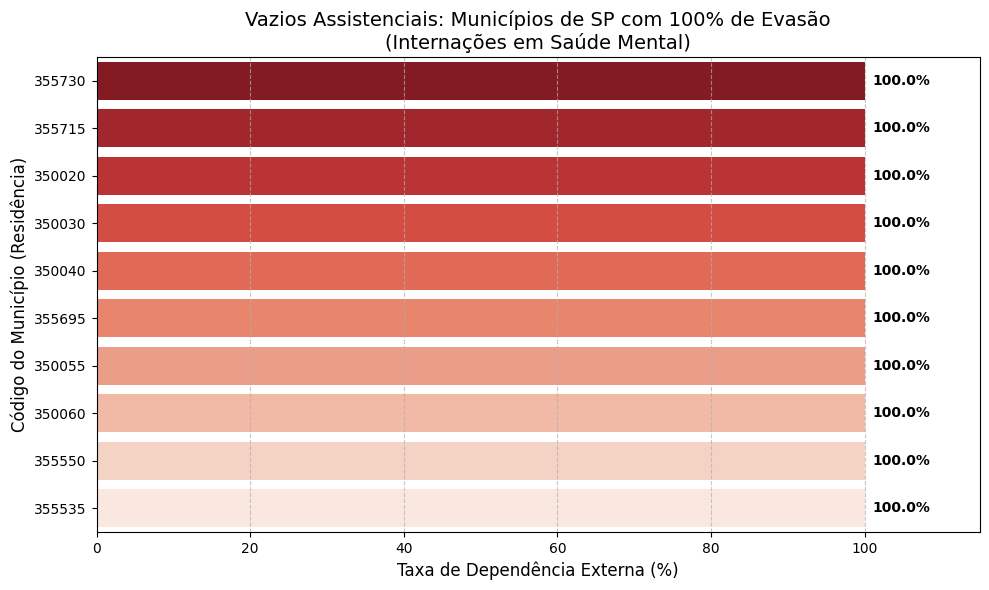

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Preparando os dados (Top 10 cidades de SP com maior evasão)
top_10_sp = taxa_dependencia_sp.head(10).reset_index()
top_10_sp.columns = ['municipio', 'taxa']

# 2. Configurando o visual
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_10_sp,
    x='taxa',
    y='municipio',
    palette='Reds_r' # Vermelho para indicar alerta/falta de serviço
)

# 3. Ajustes de títulos e rótulos
plt.title('Vazios Assistenciais: Municípios de SP com 100% de Evasão\n(Internações em Saúde Mental)', fontsize=14)
plt.xlabel('Taxa de Dependência Externa (%)', fontsize=12)
plt.ylabel('Código do Município (Residência)', fontsize=12)

# Adicionando o rótulo de 100% ao lado de cada barra
for i, v in enumerate(top_10_sp['taxa']):
    plt.text(v + 1, i, f'{v:.1f}%', va='center', fontweight='bold')

plt.xlim(0, 115) # Ajusta o limite para o texto não sair do gráfico
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

**Análise Inicial - Top 10 Cidades que mais recebem pacientes de outros municípios**

O gráfico dos municípios hubs destaca a centralização extrema do atendimento em saúde mental em São Paulo. Um único código de município (352260) lidera com folga, recebendo mais de 11.200 pacientes externos, volume quase duas vezes maior que o segundo colocado.
Essa concentração em apenas 10 cidades receptoras evidencia que o sistema hospitalar opera em rede de dependência regional. Enquanto diversos municípios registram 100% de evasão, esses "hubs" absorvem toda a demanda, o que gera uma pressão desproporcial sobre sua infraestrutura e confirma que o acesso ao tratamento está geograficamente restrito a poucos pólos de atendimento.



In [ ]:
# 1. Filtra apenas casos onde o paciente saiu da sua cidade (Evasão)
df_fora = df_tratado[df_tratado['MUNIC_RES'] != df_tratado['MUNIC_MOV']]

# 2. Conta quem mais recebeu esses pacientes "estrangeiros"
hubs_hospitalares = (
    df_fora.groupby('MUNIC_MOV')
    .size()
    .reset_index(name='pacientes_recebidos')
    .sort_values('pacientes_recebidos', ascending=False)
)

print("Top 10 Cidades que mais recebem pacientes de outros municípios:")
print(hubs_hospitalares.head(10))

Top 10 Cidades que mais recebem pacientes de outros municípios:
    MUNIC_MOV  pacientes_recebidos
84     352260                11257
55     351518                 5786
5      350190                 5380
61     351670                 4436
139    354140                 4053
166    355030                 3861
98     352530                 3443
41     351110                 3316
146    354390                 3225
0      350010                 3005


/tmp/ipython-input-1950275940.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


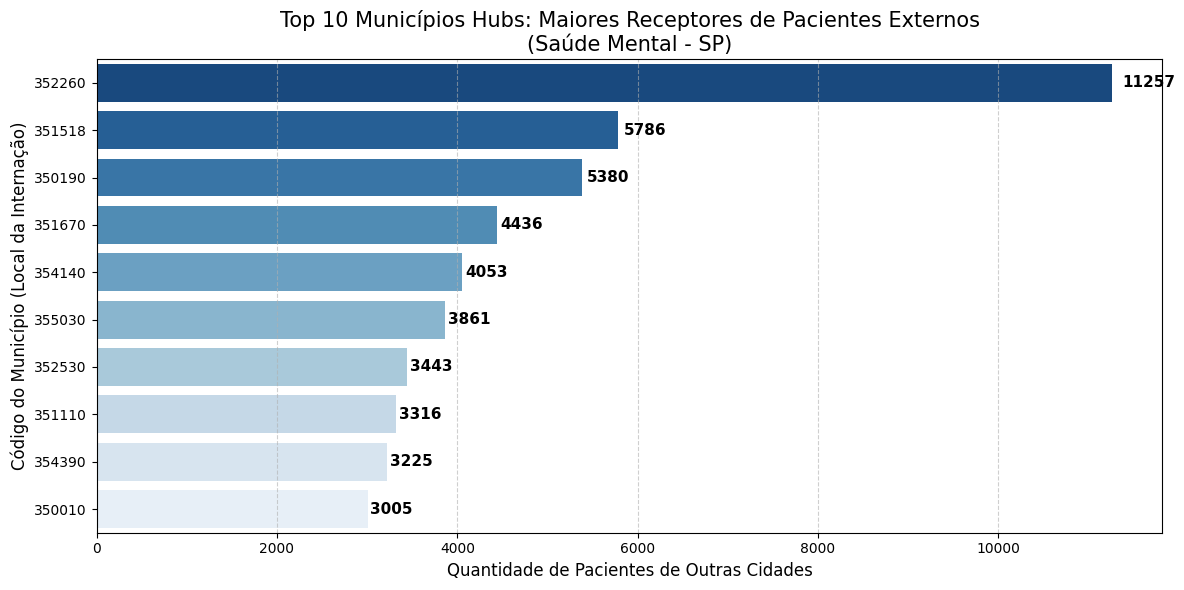

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Preparando os dados (Top 10 hubs)
top_10_hubs = hubs_hospitalares.head(10).copy()

# 2. Configurando o visual
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_10_hubs,
    x='pacientes_recebidos',
    y='MUNIC_MOV',
    palette='Blues_r' # Usando azul para diferenciar do gráfico de dependência (vermelho)
)

# 3. Ajustes de títulos e eixos
plt.title('Top 10 Municípios Hubs: Maiores Receptores de Pacientes Externos\n(Saúde Mental - SP)', fontsize=15)
plt.xlabel('Quantidade de Pacientes de Outras Cidades', fontsize=12)
plt.ylabel('Código do Município (Local da Internação)', fontsize=12)

# Adicionando os valores exatos ao lado das barras
for i, v in enumerate(top_10_hubs['pacientes_recebidos']):
    plt.text(v + (v * 0.01), i, f'{int(v)}', va='center', fontsize=11, fontweight='bold')

plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()

## **1.7. Óbito**

### **1.7.1. Taxa de Óbito Por Ano**

**Análise Inicial**

A queda na mortalidade (0,31% para 0,28%) indica eficiência técnica no hospital, mas mascara a desigualdade no acesso pós-COVID. O índice baixo foca apenas em quem conseguiu vaga, ignorando a demanda reprimida que sobrecarrega os grandes centros. Em um cenário de desigualdade, esse dado positivo convive com a exclusão de pacientes em cidades que sofrem com vazios assistenciais. Assim, a melhora nos indicadores hospitalares não anula o abismo social de quem sequer consegue chegar ao sistema.

/tmp/ipython-input-449342718.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=taxa_obito_ano, x='Ano', y='Taxa_Obito', palette='mako')


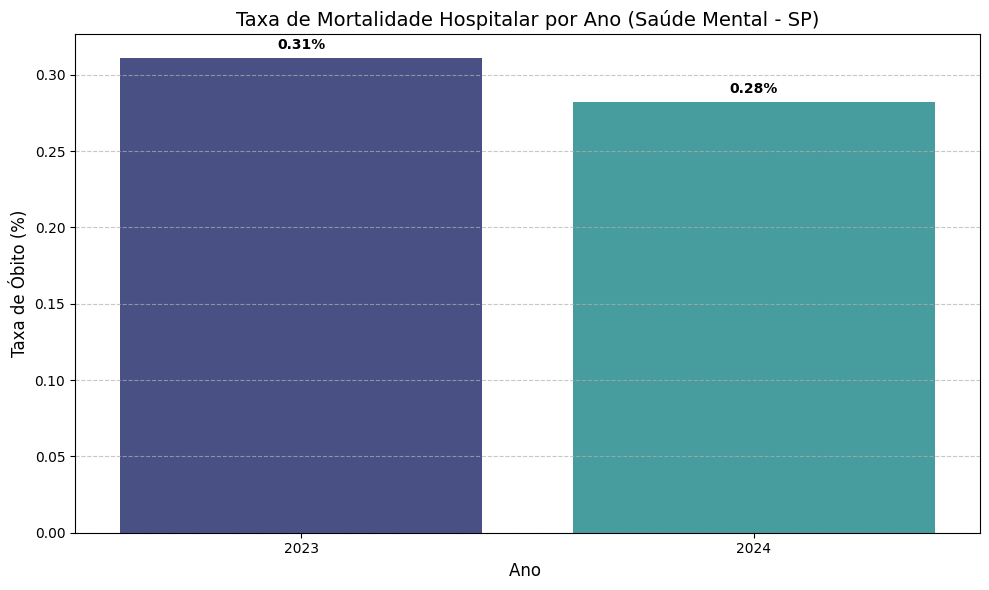

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Garante que a coluna MORTE seja numérica (0 ou 1)
df_tratado['MORTE'] = pd.to_numeric(df_tratado['MORTE'], errors='coerce')

# 2. Calcula a taxa por ano
taxa_obito_ano = (df_tratado.groupby('ANO_CMPT')['MORTE'].mean() * 100).reset_index()
taxa_obito_ano.columns = ['Ano', 'Taxa_Obito']

# 3. Criando o gráfico
plt.figure(figsize=(10, 6))
sns.barplot(data=taxa_obito_ano, x='Ano', y='Taxa_Obito', palette='mako')

# Ajustes de título e eixos
plt.title('Taxa de Mortalidade Hospitalar por Ano (Saúde Mental - SP)', fontsize=14)
plt.ylabel('Taxa de Óbito (%)', fontsize=12)
plt.xlabel('Ano ', fontsize=12)

# Adicionando os valores em cima das barras para facilitar a leitura
for i, v in enumerate(taxa_obito_ano['Taxa_Obito']):
    plt.text(i, v + (v * 0.02), f'{v:.2f}%', ha='center', fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Se estiver no Jupyter/Colab use plt.show(), se quiser salvar use:
plt.savefig('taxa_obito_ano.png')
plt.show()

### **1.7.2. Óbito Por Idade**

**Análise Inicial**

A taxa de óbito de 1,23% entre idosos (60+) é quase sete vezes maior que a de adultos, evidenciando a fragilidade desse grupo no pós-COVID. Enquanto a mortalidade geral caiu, a letalidade concentrada na terceira idade expõe uma desigualdade no desfecho clínico conforme a faixa etária. Esse abismo indica que, embora adultos (20-59) dominem o volume de internações, os idosos sofrem o maior impacto fatal no sistema hospitalar. Assim, a gestão de crises em saúde mental ainda falha em proteger proporcionalmente a população mais velha e vulnerável.

/tmp/ipython-input-2115032494.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  morte_por_idade = df_tratado.groupby('faixa_etaria')['MORTE'].mean() * 100
/tmp/ipython-input-2115032494.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=morte_por_idade.index, y=morte_por_idade.values, palette='Blues')


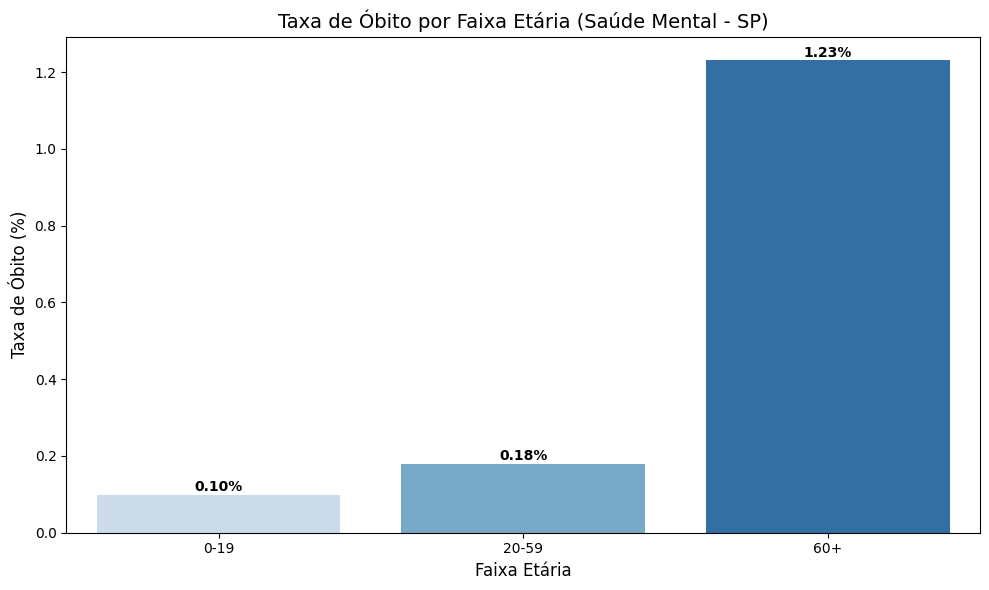

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Criando as faixas etárias conforme pedido (0-19, 20-59, 60+)
# Usamos -1 para garantir que a idade 0 seja incluída
bins = [-1, 19, 59, 120]
labels = ['0-19', '20-59', '60+']
df_tratado['faixa_etaria'] = pd.cut(df_tratado['IDADE'], bins=bins, labels=labels)

# 2. Calculando a taxa de óbito por faixa
morte_por_idade = df_tratado.groupby('faixa_etaria')['MORTE'].mean() * 100

# 3. Gerando o gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x=morte_por_idade.index, y=morte_por_idade.values, palette='Blues')

plt.title('Taxa de Óbito por Faixa Etária (Saúde Mental - SP)', fontsize=14)
plt.ylabel('Taxa de Óbito (%)', fontsize=12)
plt.xlabel('Faixa Etária', fontsize=12)

# Adicionando os valores nas barras
for i, v in enumerate(morte_por_idade.values):
    plt.text(i, v + 0.01, f'{v:.2f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

### **1.7.3. Óbito Por Sexo**

**Análise Inicial**

A taxa de óbito por sexo é quase idêntica (0,30% homens e 0,29% mulheres), mostrando que o risco fatal hospitalar independe do gênero. No cenário pós-COVID, isso indica que a desigualdade não está no tratamento interno, mas no acesso: homens são internados em maior volume e geralmente em estados mais graves. O dado comprova uma eficiência técnica uniforme do sistema para ambos os sexos após a admissão. A disparidade real permanece na falta de políticas preventivas, que empurra o público masculino para o hospital apenas em crises agudas. Assim, o gênero não dita a mortalidade, mas sim o abismo social no cuidado básico de saúde mental.

/tmp/ipython-input-1081924192.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taxa_obito_sexo.index, y=taxa_obito_sexo.values, palette='Blues', width=0.4)


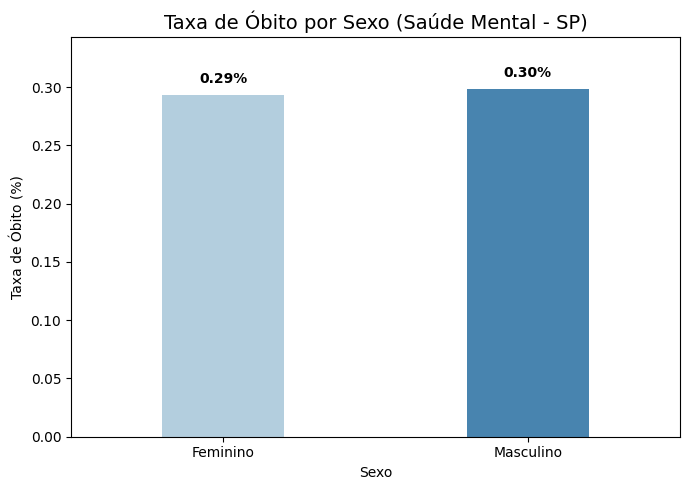

In [ ]:
# 1. Garante que a coluna MORTE é numérica
df_tratado['MORTE'] = pd.to_numeric(df_tratado['MORTE'], errors='coerce')

# 2. Calcula a taxa por sexo
taxa_obito_sexo = df_tratado.groupby('SEXO')['MORTE'].mean() * 100

# 4. Gráfico
plt.figure(figsize=(7, 5))
sns.barplot(x=taxa_obito_sexo.index, y=taxa_obito_sexo.values, palette='Blues', width=0.4)

plt.title('Taxa de Óbito por Sexo (Saúde Mental - SP)', fontsize=14)
plt.ylabel('Taxa de Óbito (%)')
plt.xlabel('Sexo')

plt.ylim(0, taxa_obito_sexo.values.max() * 1.15)

for i, v in enumerate(taxa_obito_sexo.values):
    plt.text(i, v + 0.01, f'{v:.2f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

### **1.7.4. Óbito Por Raça/Cor**

**Análise Inicial**

A taxa de óbito por raça mostra que amarelos (0,46%) e brancos (0,32%) morrem mais no hospital que pretos (0,28%) e pardos (0,21%). No pós-COVID, essa variação reforça que o risco fatal não atinge a todos de forma igualitária no sistema. A taxa zero entre indígenas e os números menores em pardos sugerem forte exclusão ou subnotificação de casos graves. O dado prova que a raça influencia o desfecho clínico, evidenciando um abismo de equidade na saúde mental. Assim, o sucesso do tratamento hospitalar depende diretamente do perfil étnico-social do paciente.

/tmp/ipython-input-2838572113.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taxa_obito_raca.index, y=taxa_obito_raca.values, palette='Blues', width=0.5)


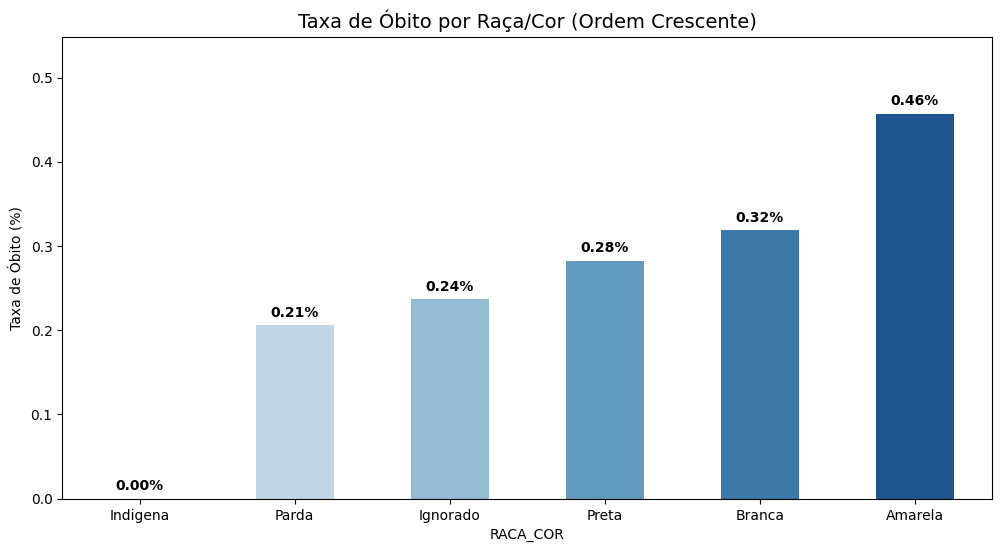

In [ ]:
# 1. Calcula a taxa e já ordena do menor para o maior
taxa_obito_raca = (df_tratado.groupby('RACA_COR')['MORTE'].mean() * 100).sort_values()

# 3. Gráfico
plt.figure(figsize=(12, 6))
sns.barplot(x=taxa_obito_raca.index, y=taxa_obito_raca.values, palette='Blues', width=0.5)

plt.title('Taxa de Óbito por Raça/Cor (Ordem Crescente)', fontsize=14)
plt.ylabel('Taxa de Óbito (%)')
plt.ylim(0, taxa_obito_raca.values.max() * 1.2)

for i, v in enumerate(taxa_obito_raca.values):
    plt.text(i, v + 0.01, f'{v:.2f}%', ha='center', fontweight='bold')

plt.show()